<a href="https://colab.research.google.com/github/AnberAziz/BS-DS-Project/blob/main/Week5Anber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

print("--- Please upload your 'kaggle.json' file ---")
# This will prompt you to upload the kaggle.json file
files.upload()

--- Please upload your 'kaggle.json' file ---


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anberaziz","key":"51b0632a958ba40eb6e93d29e8ea615c"}'}

In [6]:
# -----------------------------------------------------------------------
# Part 1 & 2: Setup and Clean Data (from Weeks 1-2)
# -----------------------------------------------------------------------
print("--- Part 1 & 2: Setting up, Downloading, and Cleaning Data ---")

# 1. Install Kaggle and set up
!pip install kaggle -q
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d aljarah/xAPI-Edu-Data -q

# --- THIS IS THE BUG FIX ---
# Corrected unzip command. -oq = overwrite and quiet.
!unzip -oq xAPI-Edu-Data.zip

print("Kaggle setup and data download complete.")

# 2. Load Libraries (NEW LIBRARIES ADDED FOR WEEK 5)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -- NEW LIBRARIES FOR SKLEARN (ML) --
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("All libraries imported.")

# 3. Load and Clean Data
df = pd.read_csv('xAPI-Edu-Data.csv')
df_cleaned = df.copy()

# Rename columns
df_cleaned.rename(columns={
    'gender': 'gender', 'NationalITy': 'nationality', 'PlaceofBirth': 'place_of_birth',
    'StageID': 'stage_id', 'GradeID': 'grade_id', 'SectionID': 'section_id',
    'Topic': 'topic', 'Semester': 'semester', 'Relation': 'relation',
    'raisedhands': 'raised_hands', 'VisITedResources': 'visited_resources',
    'AnnouncementsView': 'announcements_view', 'Discussion': 'discussion',
    'ParentAnsweringSurvey': 'parent_answering_survey',
    'ParentschoolSatisfaction': 'parent_school_satisfaction',
    'StudentAbsenceDays': 'student_absence_days', 'Class': 'class_label'
}, inplace=True)

# Drop duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Encode categorical/binary features
df_cleaned['student_absence_days'] = df_cleaned['student_absence_days'].map({'Under-7': 0, 'Above-7': 1})
df_cleaned['parent_answering_survey'] = df_cleaned['parent_answering_survey'].map({'Yes': 1, 'No': 0})
df_cleaned['parent_school_satisfaction'] = df_cleaned['parent_school_satisfaction'].map({'Good': 1, 'Bad': 0})

# Clip outliers (as in Week 2)
Q1 = df_cleaned['raised_hands'].quantile(0.25)
Q3 = df_cleaned['raised_hands'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned['raised_hands'] = df_cleaned['raised_hands'].clip(lower=lower_bound, upper=upper_bound)

print("--- Data Cleaning Complete. Ready for Regression. ---")

--- Part 1 & 2: Setting up, Downloading, and Cleaning Data ---
Dataset URL: https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data
License(s): CC-BY-SA-4.0
Kaggle setup and data download complete.
All libraries imported.
--- Data Cleaning Complete. Ready for Regression. ---



--- Part 3: Week 5 Supervised Learning: Regression ---

[Task: Splitting data into Training and Testing sets]
Data split into training and testing sets:
  Training features (X_train) shape: (382, 1)
  Testing features (X_test) shape:   (96, 1)
  Training target (y_train) shape: (382,)
  Testing target (y_test) shape:   (96,)

[Class Task: Implementing Linear Regression]
Model trained. The formula is:
  visited_resources = 0.7434 * raised_hands + 19.7904

[Assignment 5: Evaluating Model Performance]
  Mean Absolute Error (MAE): 20.09
  Root Mean Squared Error (RMSE): 24.32

Interpretation: On average, our model's prediction of 'visited_resources' is off by about 20.09 visits.

[Visualization: Regression Line on Test Data]


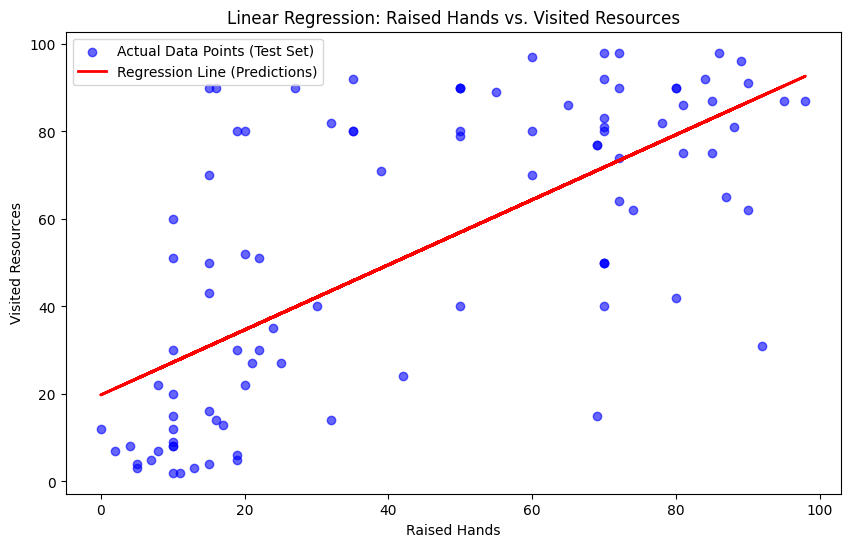


[Project Milestone: Baseline Regression Model Completed]
This model fulfills the Week 5 regression task. Our project's *actual* target ('class_label')
is categorical, so we will build a baseline *classification* model in Week 6.

--- Week 5 Complete! ---


In [7]:
# -----------------------------------------------------------------------
# Part 3: Week 5 - Supervised Learning: Regression
# -----------------------------------------------------------------------
print("\n--- Part 3: Week 5 Supervised Learning: Regression ---")

# --- Assignment 5: Train/Test Split ---
print("\n[Task: Splitting data into Training and Testing sets]")

# 1. Define our features (X) and target (y)
# For this *assignment*, we predict 'visited_resources' using 'raised_hands'.
# Note: X must be a 2D array (e.g., a DataFrame), so we use double brackets [[]].
# y can be a 1D array (e.g., a Series).
X = df_cleaned[['raised_hands']]
y = df_cleaned['visited_resources']

# 2. Split the data
# We'll use 80% for training the model and 20% for testing its performance.
# 'random_state=42' ensures we get the same "random" split every time we run this.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets:")
print(f"  Training features (X_train) shape: {X_train.shape}")
print(f"  Testing features (X_test) shape:   {X_test.shape}")
print(f"  Training target (y_train) shape: {y_train.shape}")
print(f"  Testing target (y_test) shape:   {y_test.shape}")

# --- Class Task: Implement Linear Regression ---
print("\n[Class Task: Implementing Linear Regression]")

# 1. Initialize the model
model = LinearRegression()

# 2. Train (fit) the model on the training data
model.fit(X_train, y_train)

print(f"Model trained. The formula is:")
print(f"  visited_resources = {model.coef_[0]:.4f} * raised_hands + {model.intercept_:.4f}")

# --- Assignment 5: Evaluate Model (MAE & RMSE) ---
print("\n[Assignment 5: Evaluating Model Performance]")

# 1. Make predictions on the *test* data (data the model has not seen)
y_pred = model.predict(X_test)

# 2. Compare predictions (y_pred) to the actual values (y_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"  Mean Absolute Error (MAE): {mae:.2f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"\nInterpretation: On average, our model's prediction of 'visited_resources' is off by about {mae:.2f} visits.")

# --- Bonus Visualization: See the model's regression line ---
print("\n[Visualization: Regression Line on Test Data]")

plt.figure(figsize=(10, 6))
# Plot the actual data points from the test set
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Actual Data Points (Test Set)')
# Plot the model's prediction line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line (Predictions)')
plt.title('Linear Regression: Raised Hands vs. Visited Resources')
plt.xlabel('Raised Hands')
plt.ylabel('Visited Resources')
plt.legend()
plt.show()

# --- Project Milestone ---
print("\n[Project Milestone: Baseline Regression Model Completed]")
print("This model fulfills the Week 5 regression task. Our project's *actual* target ('class_label')")
print("is categorical, so we will build a baseline *classification* model in Week 6.")
print("\n--- Week 5 Complete! ---")